In [1]:
from google.colab import files
uploaded = files.upload()


Saving News.csv to News.csv


In [2]:
import pandas as pd

df = pd.read_csv('News.csv')
print("Original dataset shape:", df.shape)
df.head()



Original dataset shape: (12520, 2)


,text,label
0,sing praise mahinda lose voice sri lanka disro...,1
1,kojc rally first time davao city appoint son god,1
2,bill gate people resist mrna tsunami exclude s...,1
3,cure covid19 forward budesonide asthma drug pl...,1
4,president trump form patriot party 81 day elec...,1


In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
import re


from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation and numbers
    tokens = re.findall(r'\b\w+\b', text)  # Simple regex tokenization
    tokens = [t for t in tokens if t not in stop_words]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return ' '.join(tokens)
df['clean_textt'] = df['text'].apply(preprocess_text)
df.head()


,text,label,clean_textt
0,sing praise mahinda lose voice sri lanka disro...,1,sing praise mahinda lose voice sri lanka disro...
1,kojc rally first time davao city appoint son god,1,kojc rally first time davao city appoint son god
2,bill gate people resist mrna tsunami exclude s...,1,bill gate people resist mrna tsunami exclude s...
3,cure covid19 forward budesonide asthma drug pl...,1,cure covid forward budesonide asthma drug pls ...
4,president trump form patriot party 81 day elec...,1,president trump form patriot party day electio...


In [ ]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 7.0 MB/s eta 0:00:00


In [ ]:
from nltk.probability import FreqDist

all_text = ' '.join(df['clean_textt'])
freq_dist = FreqDist(all_text.split())
freq_dict = dict(freq_dist)
freq_dist

FreqDist({'people': 1631, 'africa': 1548, 'say': 1431, 'president': 1384, 'year': 1317, 'new': 1266, 'country': 1162, 'south': 1121, 'world': 1106, 'one': 1089, ...})

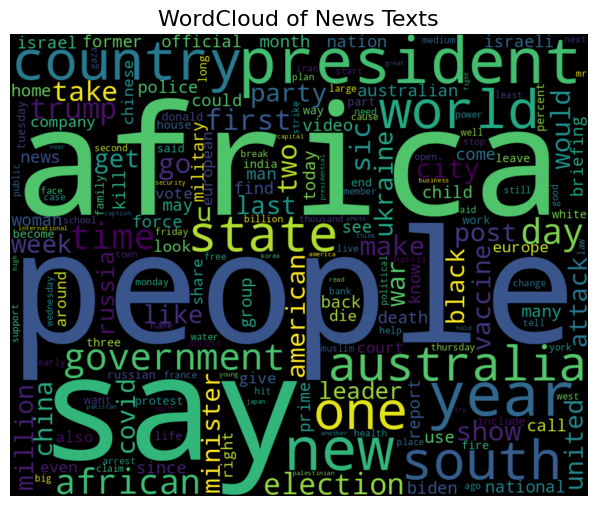

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


wordcloud = WordCloud(width=1000, height=800, background_color='black').generate_from_frequencies(freq_dict)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of News Texts", fontsize=16)
plt.show()



In [5]:
df['clean_text'] = df['clean_textt'].apply(lambda x: x.split())
df['clean_text']

,clean_text
0,"[sing, praise, mahinda, lose, voice, sri, lank..."
1,"[kojc, rally, first, time, davao, city, appoin..."
2,"[bill, gate, people, resist, mrna, tsunami, ex..."
3,"[cure, covid, forward, budesonide, asthma, dru..."
4,"[president, trump, form, patriot, party, day, ..."
...,...
12515,"[kosher, economy, businesse, israel, include, ..."
12516,"[scene, authority, force, vaccination, people,..."
12517,"[world, briefing, africa, south, africa, setba..."
12518,"[text, image, read, daniel, andrew, net, worth..."


In [6]:
all_words = sum(df['clean_text'], [])
all_words = list(set(all_words))

encoded_words = []

for words in df['clean_text']:

    encoded = [1 if word in words else 0 for word in all_words]
    encoded_words.append(encoded)

encoded_df = pd.DataFrame(encoded_words, columns=all_words)

print(encoded_df)

       davy  trumpendorse  wmc  keon  possessor  cia  trampled  fourunder  \
0         0             0    0     0          0    0         0          0   
1         0             0    0     0          0    0         0          0   
2         0             0    0     0          0    0         0          0   
3         0             0    0     0          0    0         0          0   
4         0             0    0     0          0    0         0          0   
...     ...           ...  ...   ...        ...  ...       ...        ...   
12515     0             0    0     0          0    0         0          0   
12516     0             0    0     0          0    0         0          0   
12517     0             0    0     0          0    0         0          0   
12518     0             0    0     0          0    0         0          0   
12519     0             0    0     0          0    0         0          0   

       alvin  polarization  ...  chapter  dtat  bid  costume  consultant  \

In [7]:
print((encoded_df.sum(axis=1) > 0).all())

True


In [8]:
print(encoded_df.sum(axis=1))

0        14
1         9
2        24
3        29
4        15
         ..
12515    14
12516    12
12517    58
12518    18
12519     8
Length: 12520, dtype: int64


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score,recall_score, precision_score, f1_score, roc_auc_score
X = encoded_df
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (10016, 28734)
Shape of y_train: (10016,)
Shape of X_test: (2504, 28734)
Shape of y_test: (2504,)


# 1.LogisticRegression Alogrithm :

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score,recall_score, precision_score, f1_score, roc_auc_score

model = LogisticRegression(C=0.1, penalty='l2', solver='liblinear')

model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]

accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, model.predict(X_train))
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_probs)



print("The accuracy on training set of logistic regression:", round(accuracy_train * 100, 2), "%")
print("The accuracy on testing set of logistic regression:", round(accuracy_test * 100, 2), "%")
print("Recall: ",round(recall * 100, 2), "%")
print("Precision: ",round(precision * 100, 2), "%")
print("F1-Score:",round(f1 * 100, 2), "%")
print("AUC Score:", round(auc * 100, 2), "%")


The accuracy on training set of logistic regression: 96.92 %
The accuracy on testing set of logistic regression: 92.25 %
Recall:  95.78 %
Precision:  91.23 %
F1-Score: 93.45 %
AUC Score: 97.89 %


##*confusion matrix*

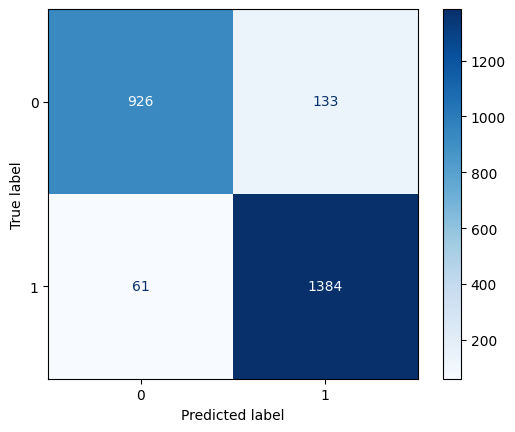

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
matrix = ConfusionMatrixDisplay(confusion_matrix=cm)
matrix.plot(cmap='Blues')


## *roc curve*

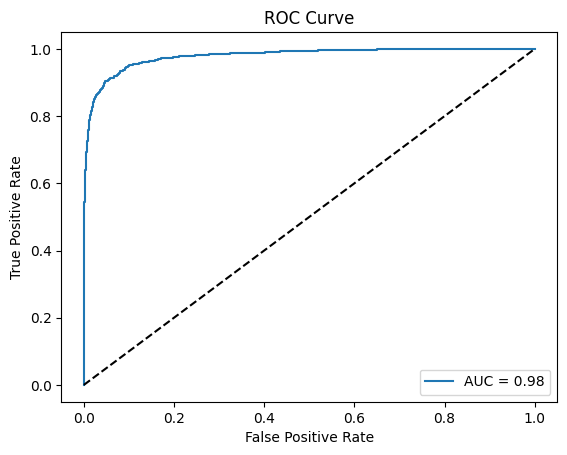

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# 2.  random forest (RF) Algorithm :

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score,recall_score, precision_score, f1_score, roc_auc_score

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    random_state=42,
    class_weight='balanced',
)

rf.fit(X_train, y_train)

rf_y_pred = rf.predict(X_test)
y_probs = rf.predict_proba(X_test)[:, 1]

accuracy_train = accuracy_score(y_train, rf.predict(X_train))
accuracy_test = accuracy_score(y_test, rf_y_pred)

recall = recall_score(y_test, rf_y_pred)
precision = precision_score(y_test, rf_y_pred)
f1 = f1_score(y_test, rf_y_pred)
auc = roc_auc_score(y_test, y_probs)



print("The accuracy on training set of random forest:", round(accuracy_train * 100, 2), "%")
print("The accuracy on testing set of random forest:", round(accuracy_test * 100, 2), "%")
print("Recall: ",round(recall * 100, 2), "%")
print("Precision: ",round(precision * 100, 2), "%")
print("F1-Score:",round(f1 * 100, 2), "%")
print("AUC Score:", round(auc * 100, 2), "%")


The accuracy on training set of random forest: 88.54 %
The accuracy on testing set of random forest: 86.14 %
Recall:  93.91 %
Precision:  83.97 %
F1-Score: 88.66 %
AUC Score: 94.4 %


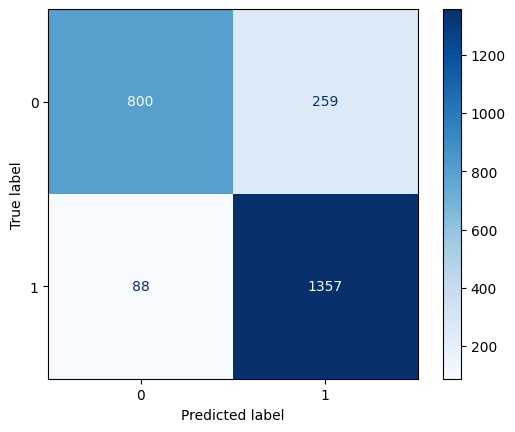

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, rf_y_pred)
matrix = ConfusionMatrixDisplay(confusion_matrix=cm)
matrix.plot(cmap='Blues')


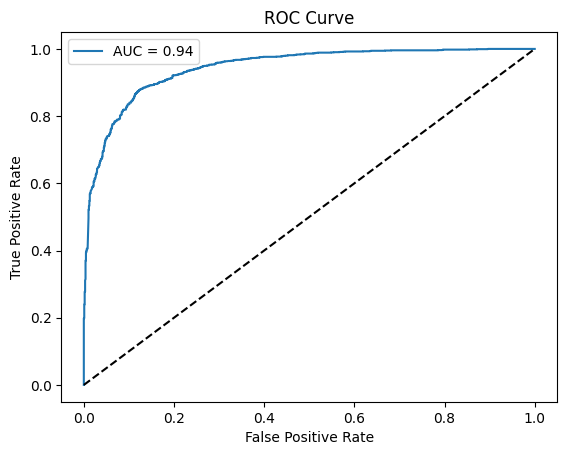

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# 3. naive_bayes algorithm :




In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import  accuracy_score,recall_score, precision_score, f1_score, roc_auc_score

nb = MultinomialNB()
nb.fit(X_train, y_train)

nb_y_pred = nb.predict(X_test)
y_probs = nb.predict_proba(X_test)[:, 1]


accuracy_train = accuracy_score(y_train, nb.predict(X_train))
accuracy_test = accuracy_score(y_test, nb_y_pred)

recall = recall_score(y_test, nb_y_pred)
precision = precision_score(y_test, nb_y_pred)
f1 = f1_score(y_test, nb_y_pred)
auc = roc_auc_score(y_test, nb_y_pred)


print("The accuracy on training set of naive_bayes:", round(accuracy_train * 100, 2), "%")
print("The accuracy on testing set of naive_bayes:", round(accuracy_test * 100, 2), "%")
print("Recall: ",round(recall * 100, 2), "%")
print("Precision: ",round(precision * 100, 2), "%")
print("F1-Score:",round(f1 * 100, 2), "%")
print("AUC Score:", round(auc * 100, 2), "%")

The accuracy on training set of naive_bayes: 96.92 %
The accuracy on testing set of naive_bayes: 93.25 %
Recall:  92.66 %
Precision:  95.51 %
F1-Score: 94.06 %
AUC Score: 93.36 %


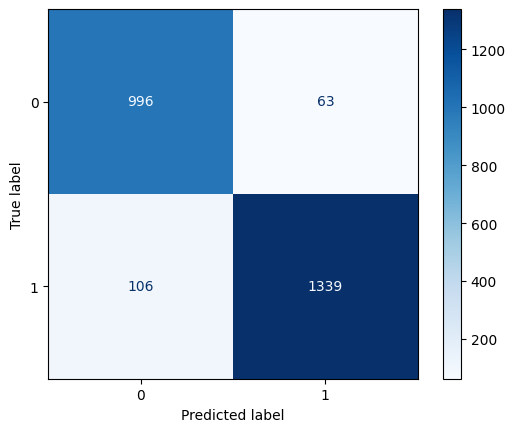

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, nb_y_pred)
matrix = ConfusionMatrixDisplay(confusion_matrix=cm)
matrix.plot(cmap='Blues')



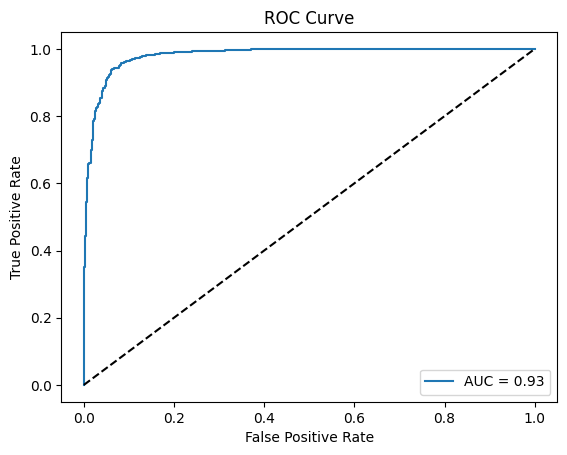

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# 4. SVM algorithm :



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import  accuracy_score,recall_score, precision_score, f1_score, roc_auc_score

svm = SVC(C=0.001,max_iter=10000,class_weight='balanced', kernel='linear', probability=True)
svm.fit(X_train, y_train)


svm_y_pred = svm.predict(X_test)
y_probs = svm.predict_proba(X_test)[:, 1]

accuracy_train = accuracy_score(y_train,  svm.predict(X_train))
accuracy_test =accuracy_score(y_test, svm_y_pred)
recall = recall_score(y_test, svm_y_pred)
precision = precision_score(y_test, svm_y_pred)
f1 = f1_score(y_test, svm_y_pred)
auc = roc_auc_score(y_test, y_probs)


print("The accuracy on training set of suport vector machine :", round(accuracy_train * 100, 2), "%")
print("The accuracy on testing set of suport vector machine :", round(accuracy_test * 100, 2), "%")
print("Recall: ",round(recall * 100, 2), "%")
print("Precision: ",round(precision * 100, 2), "%")
print("F1-Score:",round(f1 * 100, 2), "%")
print("AUC Score:", round(auc * 100, 2), "%")

The accuracy on training set of suport vector machine : 92.32 %
The accuracy on testing set of suport vector machine : 90.42 %
Recall:  93.77 %
Precision:  90.03 %
F1-Score: 91.86 %
AUC Score: 89.8 %


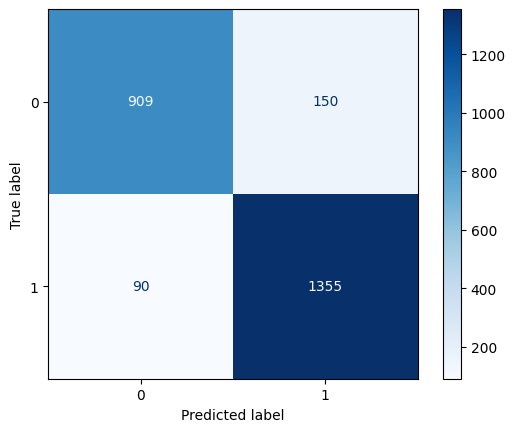

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, svm_y_pred)
matrix = ConfusionMatrixDisplay(confusion_matrix=cm)
matrix.plot(cmap='Blues')


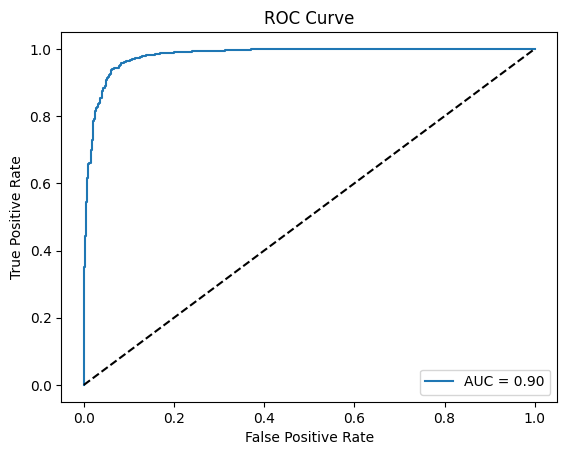

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 119.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 117.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 125.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.4 MB/s eta 0:00:00


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dense_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.1)),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

dense_model.compile(optimizer=Adam(learning_rate=0.002), loss='binary_crossentropy', metrics=['accuracy'])

dense_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

dense_preds = (dense_model.predict(X_test) > 0.5).astype("int32")
dense_probs = dense_model.predict(X_test)

accuracy_train = dense_model.evaluate(X_train, y_train, verbose=0)[1]
accuracy_test = accuracy_score(y_test, dense_preds)
precision = precision_score(y_test, dense_preds)
recall = recall_score(y_test, dense_preds)
f1 = f1_score(y_test, dense_preds)
auc = roc_auc_score(y_test, dense_probs)

# Print results
print("The accuracy on training set of Dense Neural Network :", round(accuracy_train * 100, 2), "%")
print("The accuracy on testing set of Dense Neural Network :", round(accuracy_test * 100, 2), "%")
print("Recall: ", round(recall * 100, 2), "%")
print("Precision: ", round(precision * 100, 2), "%")
print("F1-Score:", round(f1 * 100, 2), "%")
print("AUC Score:", round(auc * 100, 2), "%")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 47s 152ms/step - accuracy: 0.8482 - loss: 3.0610 - val_accuracy: 0.8912 - val_loss: 1.6044
Epoch 2/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 40s 142ms/step - accuracy: 0.8806 - loss: 1.3019 - val_accuracy: 0.8862 - val_loss: 1.0663
Epoch 3/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 41s 145ms/step - accuracy: 0.8870 - loss: 0.9576 - val_accuracy: 0.8992 - val_loss: 0.8847
Epoch 4/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 41s 144ms/step - accuracy: 0.9062 - loss: 0.7793 - val_accuracy: 0.8942 - val_loss: 0.7816
Epoch 5/5
282/282 ━━━━━━━━━━━━━━━━━━━━ 40s 142ms/step - accuracy: 0.9099 - loss: 0.7182 - val_accuracy: 0.8972 - val_loss: 0.7102
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
The accuracy on training set of Dense Neural Network : 93.13 %
The accuracy on testing set of Dense Neural Network : 90.26 %
Recall:  91.7 %
Precision:  91.44 %
F1-Score: 91.57 %
AUC Score: 96.38 %


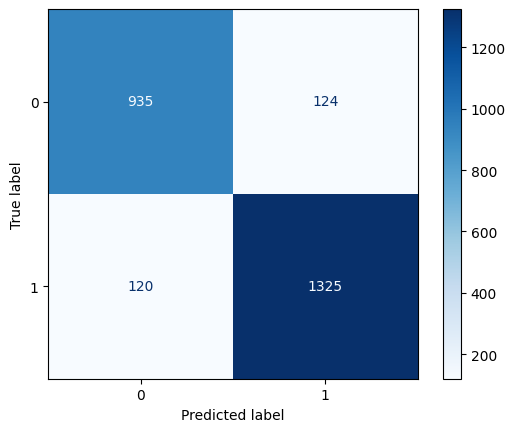

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, dense_preds)
matrix = ConfusionMatrixDisplay(confusion_matrix=cm)
matrix.plot(cmap='Blues')




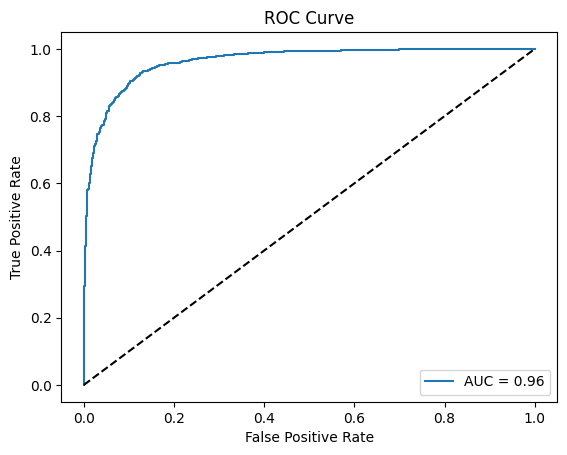

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, dense_probs)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [10]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 110.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 107.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 107.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.2 MB/s eta 0:00:00


##RASNET MLP


In [26]:
import numpy as np
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Add, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


input_dim = X_train.shape[1]


def residual_block(x, units):
    shortcut = x
    x = Dense(units, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(units)(x)
    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x


inputs = Input(shape=(input_dim,))

x = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(inputs)
x = Dropout(0.5)(x)


x = residual_block(x, 64)

outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs, outputs)


model.compile(optimizer=Adam(learning_rate=0.002), loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


train_acc = model.evaluate(X_train, y_train, verbose=0)[1]


y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)


accuracy_test = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_probs)


print(f"Training Accuracy of ResNet-Style MLP: {train_acc*100:.2f}%")
print(f"Test Accuracyof ResNet-Style MLP: {accuracy_test*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1-Score: {f1*100:.2f}%")
print(f"AUC: {auc*100:.2f}%")


Epoch 1/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 21s 71ms/step - accuracy: 0.8327 - loss: 0.6913 - val_accuracy: 0.9172 - val_loss: 0.7592
Epoch 2/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 19s 68ms/step - accuracy: 0.9258 - loss: 0.7189 - val_accuracy: 0.9092 - val_loss: 0.8773
Epoch 3/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 19s 68ms/step - accuracy: 0.9285 - loss: 0.8027 - val_accuracy: 0.9062 - val_loss: 0.9151
Epoch 4/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 19s 68ms/step - accuracy: 0.9360 - loss: 0.8160 - val_accuracy: 0.9062 - val_loss: 0.9493
Epoch 5/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 19s 68ms/step - accuracy: 0.9332 - loss: 0.8158 - val_accuracy: 0.9052 - val_loss: 0.9319
Epoch 6/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 19s 67ms/step - accuracy: 0.9407 - loss: 0.7961 - val_accuracy: 0.9072 - val_loss: 0.9242
Epoch 7/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 19s 67ms/step - accuracy: 0.9330 - loss: 0.8414 - val_accuracy: 0.9182 - val_loss: 0.9042
Epoch 8/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 19s 67ms/step - accuracy: 0.9334 - loss: 0.8191 - 

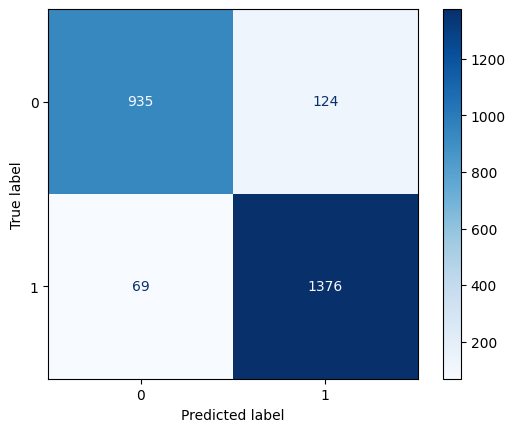

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
matrix = ConfusionMatrixDisplay(confusion_matrix=cm)
matrix.plot(cmap='Blues')





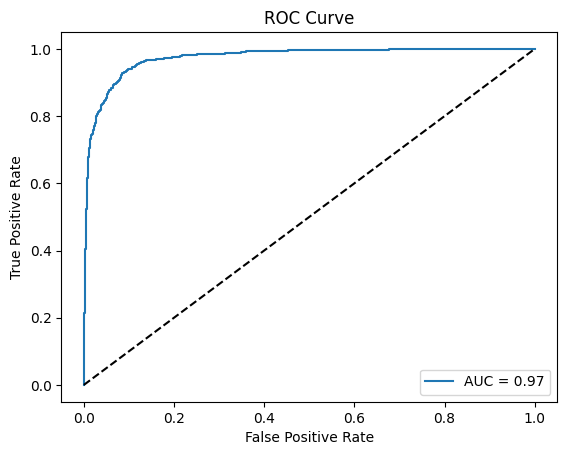

In [25]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
